In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.image as mpimg
from PIL import Image
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn import datasets
import datetime
import math

In [2]:
# Preprocessess


# import df and create storage arrays
df = pd.read_csv("final_output.csv")
latarray = []
longarray = []

# put lat and long into arrays
for x in range(len(df)):
    coord = df.iloc[x]['Location']
    lat,long = coord.split(' ', 2)
    lat = float(lat)
    long = float(long)
    latarray.append(lat)
    longarray.append(long)
    

# put arrays into new data frame
dflocation = pd.DataFrame(list(zip(latarray,longarray)),columns =['lat','long']) 



In [3]:
# finding map range
longmin = dflocation.long.min()
longmax = dflocation.long.max()      
latmin = dflocation.lat.min()
latmax = dflocation.lat.max()



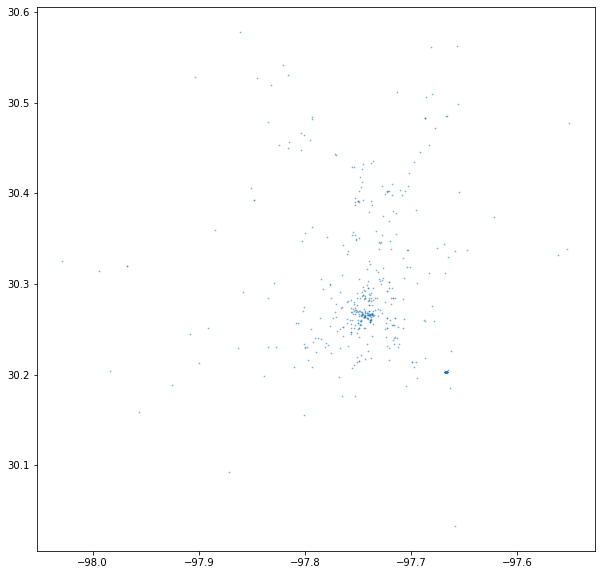

FileNotFoundError: [Errno 2] No such file or directory: 'mapbig.jpg'

In [4]:
# basic scatter plot


plt.scatter(longarray, latarray, s=.5, alpha=0.5)

# set size
plt.gcf().set_size_inches((10, 10)) 

plt.show()

# showing map

pil_im = Image.open('mapbig.jpg', 'r')
display(pil_im)

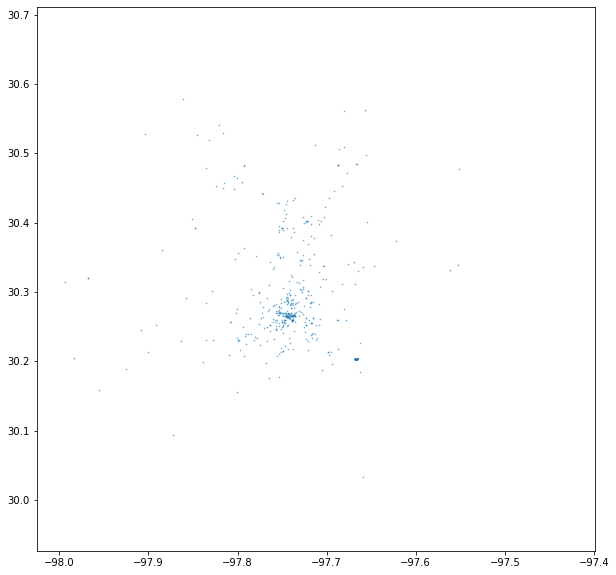

In [6]:
# zoomed in scatter plot


plt.scatter(longarray, latarray, s=.5, alpha=0.5)

# set size
plt.gcf().set_size_inches((10, 10)) 

plt.xlim(-98.0255, -97.3993)
plt.ylim(29.9264, 30.7111)
plt.show()



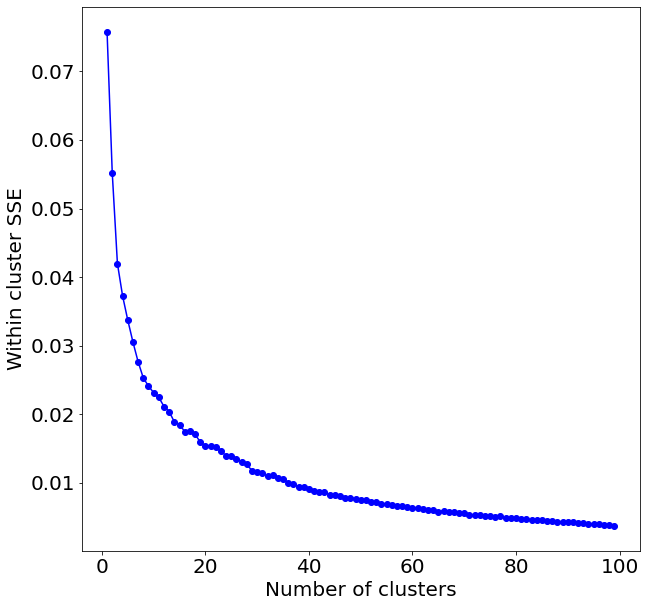

In [9]:
# elbow method

X = np.array(list(zip(longarray, latarray))).reshape(len(longarray), 2)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 100)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

fig,ax=plt.subplots(figsize=(10,10)) 
ax.plot(K, distortions, color='blue', marker='o')
ax.set_xlabel('Number of clusters',fontsize=20)
ax.set_ylabel('Within cluster SSE',fontsize=20)
#ax.set_title('The Elbow Method using Distortion')
ax.tick_params(axis='both',which='major',labelsize=20)
plt.savefig("findingK.png")

In [8]:
X.shape



(475, 2)

[[ 30.20355072 -97.66994203]
 [ 30.26378102 -97.74725547]
 [ 30.40317949 -97.73176923]
 [ 30.225      -97.79785714]
 [ 30.23475    -97.8905    ]
 [ 30.46066667 -97.80191667]
 [ 30.49564286 -97.67992857]
 [ 30.33257143 -97.68114286]
 [ 30.34654545 -97.74131818]
 [ 30.21323529 -97.75023529]
 [ 30.033      -97.659     ]
 [ 30.34833333 -97.579     ]
 [ 30.374      -97.83257143]
 [ 30.29253448 -97.73513793]
 [ 30.16125    -97.93425   ]
 [ 30.28323077 -97.80161538]
 [ 30.478      -97.551     ]
 [ 30.53733333 -97.8465    ]
 [ 30.31975    -97.98975   ]
 [ 30.25051724 -97.71275862]]


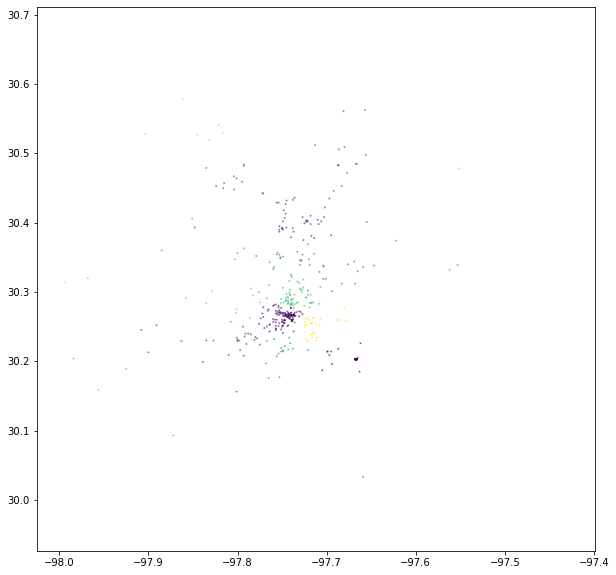

In [7]:
# running kmeans algorithm
kmeans = KMeans(n_clusters=20).fit(dflocation)
centroids = kmeans.cluster_centers_
print(centroids)

free= plt.scatter(dflocation['long'], dflocation['lat'], c= kmeans.labels_.astype(float), s=1, alpha=0.5)
plt.gcf().set_size_inches((10, 10)) 
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=5000)
plt.xlim(-98.0255, -97.3993)
plt.ylim(29.9264, 30.7111)
plt.show()


In [8]:
# add cluster to df, drop columns

df['Cluster'] = kmeans.labels_


df.drop(['RideID','Date','Unnamed: 0'], axis=1, inplace=True)



14

In [45]:
# change time format

timearray = []
for x in range(len(df)):
    time = df.iloc[x]['Time']
    time = str(time)
    H,M,S = time.split(':')
     
    H = int(H)
    M = int(M)
    print(M)
    S = int(S)
    # minutes = (H*60)+ M
    # minutes = int(round(minutes/15.0)*15.0)
    # increment = minutes/15
    increment = H*4 + int(M/15)
    timearray.append(increment)
    
df['Time[Increments of 15]'] = timearray
df.drop(['Time'], axis=1, inplace=True)



21
55
36
26
11
18
15
4
56
9
27
39
14
28
58
22
32
59
27
8
14
30
47
2
28
59
51
15
26
13
47
25
43
48
27
21
11
33
18
40
45
19
11
46
19
1
34
58
15
52
31
20
12
13
10
27
29
46
8
34
14
55
38
34
50
38
37
16
29
12
19
45
33
16
39
25
43
57
41
50
29
58
52
28
2
37
6
35
45
20
30
19
46
24
26
27
16
14
5
59
27
49
38
35
30
52
38
48
58
40
32
40
4
11
48
15
21
42
45
28
52
34
23
28
53
25
7
2
2
7
57
16
9
15
52
47
58
50
7
12
30
53
12
53
6
4
19
41
57
13
32
15
12
6
19
36
33
29
8
4
25
0
42
53
13
0
3
24
31
10
56
25
45
23
32
47
14
10
10
55
48
52
37
22
48
22
8
29
14
49
30
44
25
46
15
25
43
58
21
11
0
12
7
11
57
43
5
11
8
30
43
0
3
22
3
29
19
21
4
40
5
6
13
23
33
24
13
24
56
23
42
59
17
18
20
0
22
4
35
6
22
21
58
20
13
26
21
47
9
50
32
2
19
32
47
59
17
43
20
7
44
48
59
36
49
25
34
52
55
33
33
53
50
48
44
58
12
34
17
48
8
48
53
25
50
22
24
4
32
53
32
9
58
47
34
55
56
49
13
0
46
57
17
6
26
1
51
16
37
22
53
52
37
38
32
47
57
57
15
59
40
3
48
11
52
16
26
53
30
13
15
11
28
13
36
6
0
10
9
45
46
58
13
40
17
14
8
34
58
23
54

In [46]:
df.columns


Index(['DriverID', 'Location', 'Cluster', 'Time[Increments of 15]'], dtype='object')

In [48]:
df['Time[Increments of 15]'].describe()

count    475.000000
mean      46.084211
std       29.044075
min        0.000000
25%       16.000000
50%       54.000000
75%       70.500000
max       94.000000
Name: Time[Increments of 15], dtype: float64

In [50]:
# final exports
df.to_csv('Dictionary.csv')

In [51]:
# finding distance from each centriod to other centroids

onode = []
dnode = []
distancearray = []



for x in range(20):
    
    
    temp = str(centroids[x])
    
    # changing form
    temp = temp.replace("[", "")
    temp = temp.replace("]", "")
    temp = temp.strip()
    temp = " ".join(temp.split())
    lat1,lon1 =temp.split(" ",2)
    
    lat1 = float(lat1)
    lon1 = float(lon1)
    
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    for y in range(20):
        
        Radius = 6373.0
        temp2 = str(centroids[y])
        
         # changing form
        temp2 = temp2.replace("[", "")
        temp2 = temp2.replace("]", "")
        temp2 = temp2.strip()
        temp2 = " ".join(temp2.split())
        lat2,lon2 =temp2.split(" ",2)
       
        
       
        lat2 = float(lat2)
        lon2 = float(lon2)
        
    
        
        lat2 = math.radians(lat2)
        lon2 = math.radians(lon2)

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        

        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        dist = Radius * c
        dist = dist * 1.4
       
        onode.append(x)
        dnode.append(y)
        distancearray.append(dist)
       
        
node_distance = pd.DataFrame(list(zip(onode,dnode,distancearray)), columns =['Orgin Node','Destination Node', 'Distance'])
node_distance.to_csv('Node_Distance.csv')

In [52]:
nodes = pd.DataFrame(list(centroids), columns =['Lat','Long'])
nodes.to_csv('Nodes.csv')

# Create distance matrix

In [14]:
import pandas as pd
df=pd.read_csv(r'C:\Users\md894973\2021_charging_infrastructure_ridesourcing_VOT\2021_charging_infrastructure_ridesourcing_VOT\src\gitRepository\Node_Distance.csv')

In [15]:
df.head()

,Unnamed: 0,Orgin Node,Destination Node,Distance
0,0,0,0,0.000000
1,1,0,1,25.312544
2,2,0,2,43.772789
3,3,0,3,35.010047
4,4,0,4,61.001576


In [17]:
distanceMatrix=pd.pivot_table(df,index=['Orgin Node'],columns=['Destination Node'],values=['Distance'])

In [20]:
distanceMatrix.to_csv("distance_matrix.csv")
